<a href="https://colab.research.google.com/github/Ennie-Albert/Multimidia/blob/main/Multimidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo pip install pytesseract

In [ ]:
!sudo pip install pillow

In [1]:
import cv2
import matplotlib.pyplot as plt
from pytesseract import image_to_string, pytesseract
from PIL import Image
import pytesseract as ocr

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = cv2.imread('/content/drive/My Drive/Placa1.jpg')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

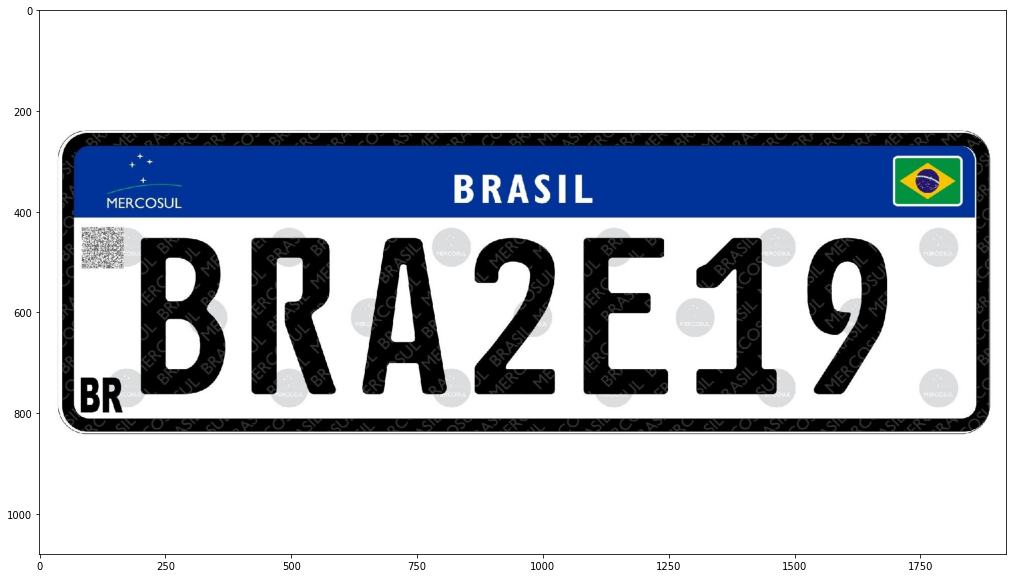

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(img)

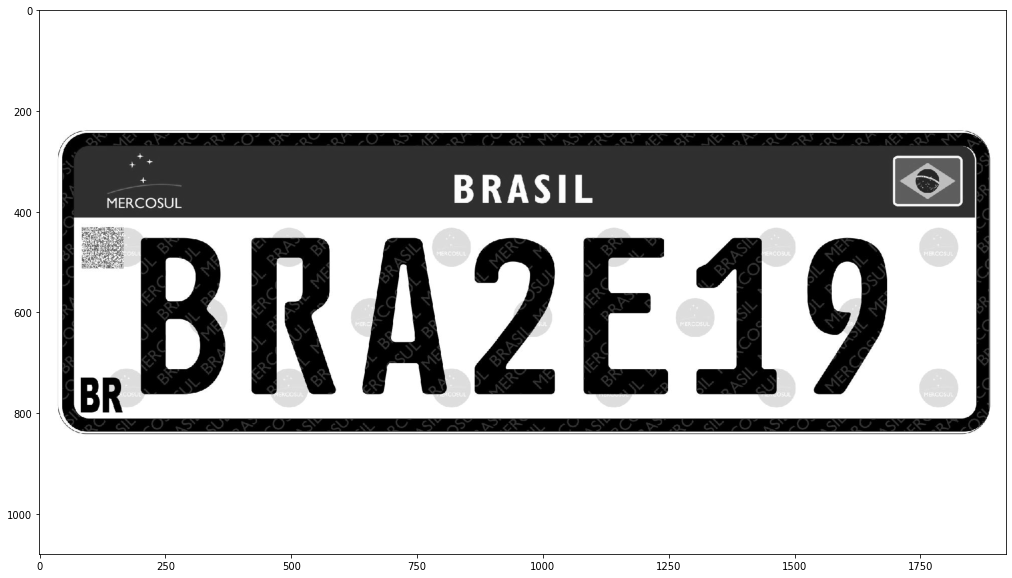

In [ ]:
img_cinza = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(20,10))
plt.imshow(img_cinza, cmap='gray')

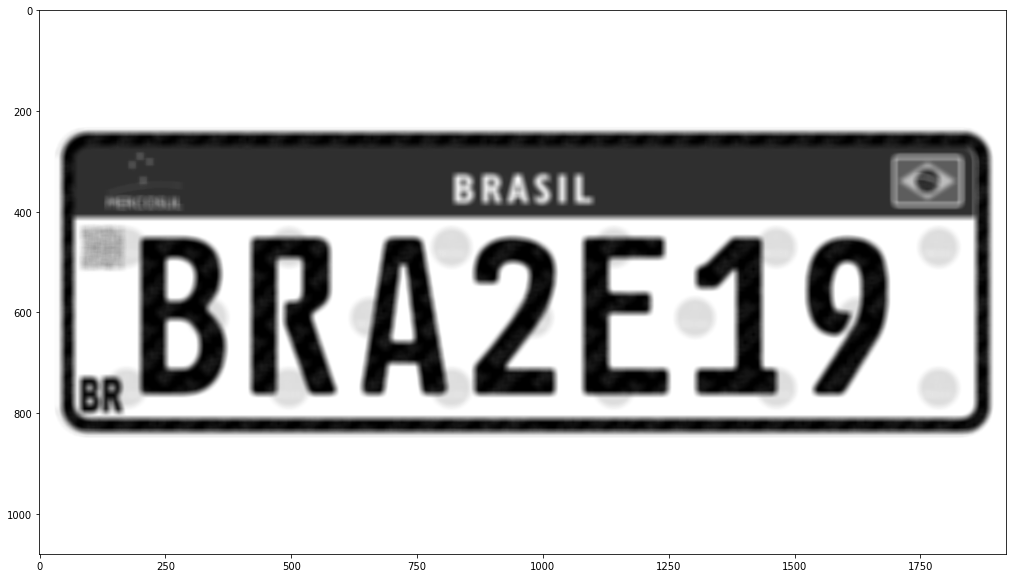

In [ ]:
img_suave = cv2.blur(img_cinza, (15,15))
plt.figure(figsize=(20,10))
plt.imshow(img_suave, cmap="gray")

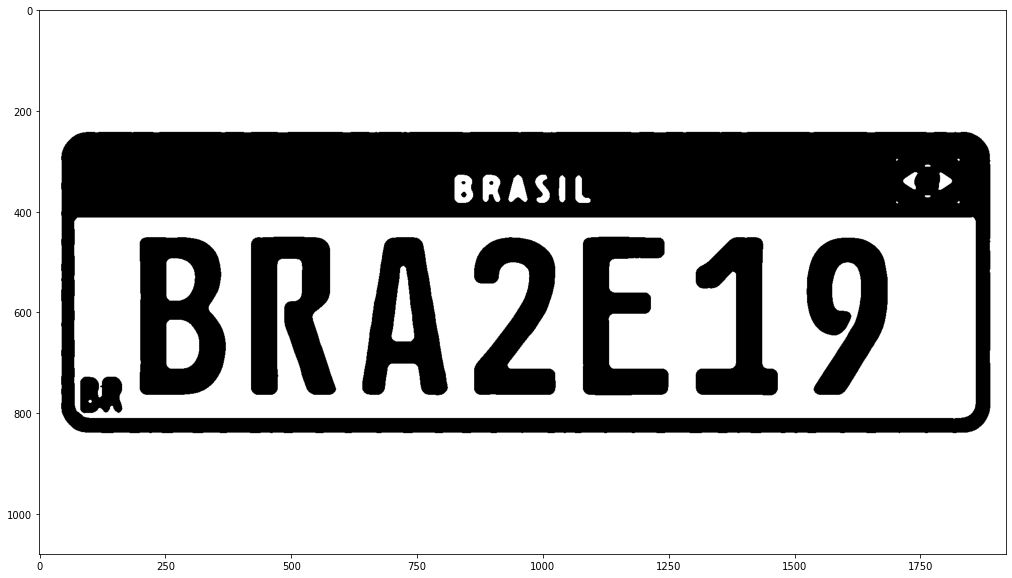

In [ ]:
_,img_lim = cv2.threshold(img_suave, 150, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(20,10))
plt.imshow(img_lim, cmap='gray')

In [ ]:
contornos, hier = cv2.findContours(img_lim, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print('Contornos encontrados: ' + str(len(contornos)))

Contornos encontrados: 32


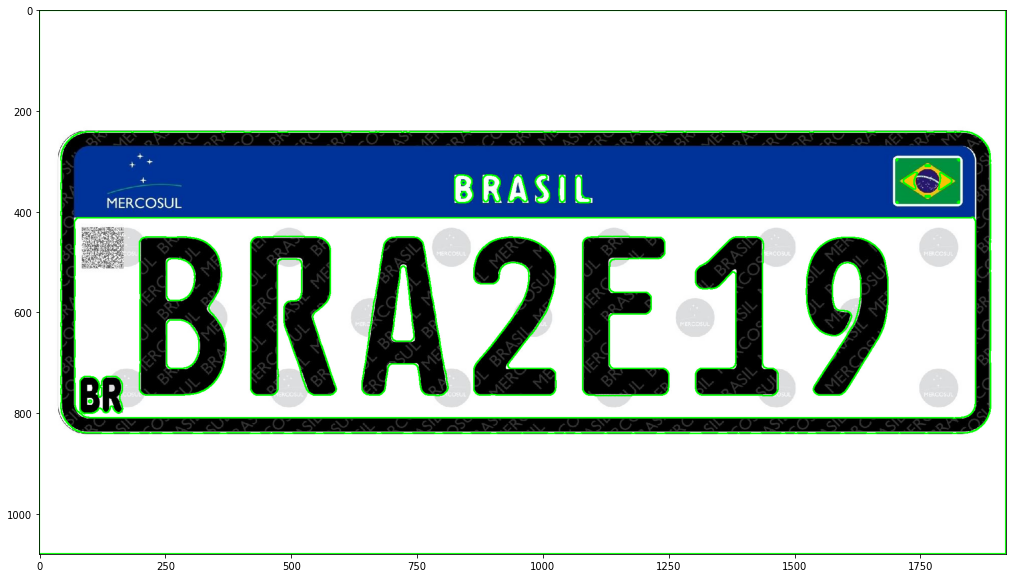

In [ ]:
img_draw = img.copy()
cv2.drawContours(img_draw, contornos, -2, (0,255,0), 2)
plt.figure(figsize=(20,10))
plt.imshow(img_draw)

In [ ]:
img_contornos = img.copy()

for contorno in contornos :
    peri = cv2.arcLength(contorno, True)

    if peri > 120:
      aprox = cv2.approxPolyDP(contorno, 0.03 * peri, True)
    if len(aprox) == 4:
      (x, y, alt, lar) = cv2.boundingRect(contorno)
      cv2.rectangle(img_contornos, (x,y), (x+alt, y+lar), (0, 255, 0), 2)

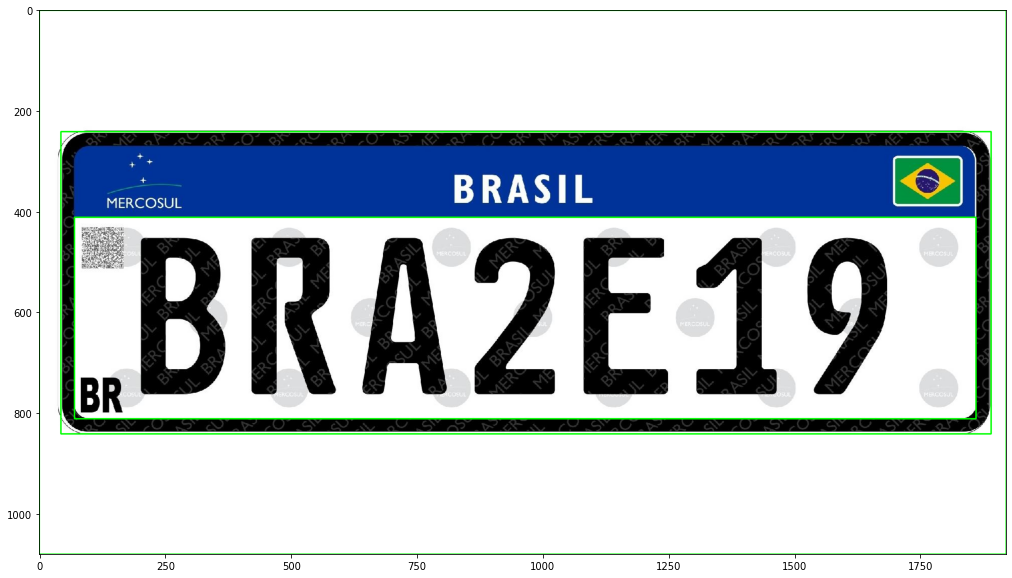

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(img_contornos)

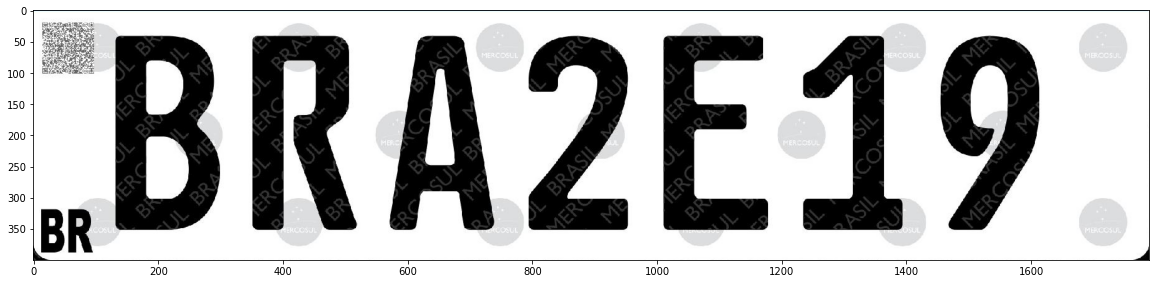

In [ ]:
corte = img[y: y+lar, x: x+alt]
plt.figure(figsize=(20,10))
plt.imshow(corte)